<a href="https://colab.research.google.com/github/shubhamshinde3/DL_collab/blob/main/DL_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Train.csv')

In [ ]:
data.shape

(8068, 11)

In [ ]:
#understanding the data by getting first 5 lines of dataset
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
# describe Meta-Data of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
#droping the unnecessary column
data.drop(columns = ['ID'],inplace = True)
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
# Checking the missing values
data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
data.nunique()

Gender              2
Ever_Married        2
Age                67
Graduated           2
Profession          9
Work_Experience    15
Spending_Score      3
Family_Size         9
Var_1               7
Segmentation        4
dtype: int64

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
for column in ['Work_Experience', 'Family_Size']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

def cat_to_num(c,data): 
  for i in range(len(c)):
    data.iloc[:,c[i]] = la.fit_transform(data.iloc[:,c[i]])
    print('\nSkewness for Column: ',skew(data.iloc[:,c[i]]))
  return data.sample(3)

In [ ]:

col = ['Gender', 'Ever_Married', 'Graduated',
       'Spending_Score', 'Segmentation']
for i in col:
    data[i] = la.fit_transform(data[i])


In [ ]:
data.sample(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
4479,1,1,86,1,Healthcare,0.0,2,1.0,Cat_6,3
294,0,0,31,0,Entertainment,0.0,2,2.0,Cat_6,3
7937,0,0,46,1,Doctor,6.0,2,2.0,Cat_6,2
4482,1,1,70,0,Executive,1.0,1,2.0,Cat_6,0
2581,1,1,55,1,Artist,1.0,0,2.0,Cat_7,0


Positive value means the distribution is skewed to the right.

Negative value means the distribution is skewed to the left.

0 means perfect normal distribution. The bell shaped curve.

In [ ]:
cat_to_num([0], data)


Skewness for Column:  -0.19074763126825195


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
2910,1,1,35,1,Artist,0.0,0,2.0,Cat_6,2
4984,0,0,35,1,Doctor,1.0,2,1.0,Cat_3,1
6114,0,2,49,0,Marketing,1.0,0,3.0,Cat_4,0


In [ ]:
for column in ['Ever_Married','Graduated','Work_Experience', 'Family_Size', 'Var_1']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1                0
Segmentation         0
dtype: int64

In [ ]:
# describing the numerical data which gives summary of all the mathematical things like mean ,max, std deviation etc
data.describe()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,0.547471,0.610188,43.466906,0.635102,2.472980,1.359941,2.814824,1.561973
std,0.497772,0.522109,16.711696,0.501113,3.265248,0.848418,1.508841,1.139029
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,40.000000,1.000000,1.000000,2.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,4.000000,2.000000,4.000000,3.000000
max,1.000000,2.000000,89.000000,2.000000,14.000000,2.000000,9.000000,3.000000


In [ ]:
data['Spending_Score'] >1

0        True
1       False
2        True
3       False
4       False
        ...  
8063     True
8064     True
8065     True
8066     True
8067    False
Name: Spending_Score, Length: 8068, dtype: bool

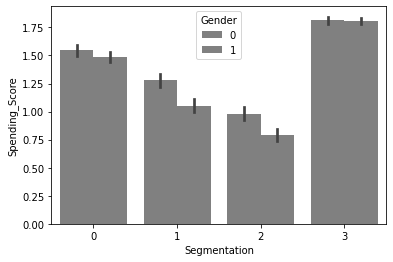

In [ ]:
#data['Spending_Score'] >1
clrs = ['grey' if max(data['Spending_Score']) > 1.25  else 'red']
sns.barplot(x='Segmentation',y='Spending_Score',hue='Gender',data=data, palette = clrs)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


"for bar in ax.patches:\n    if bar.get_height() > 2.5:\n        bar.set_color('green')    \n    else:\n        bar.set_color('grey')"

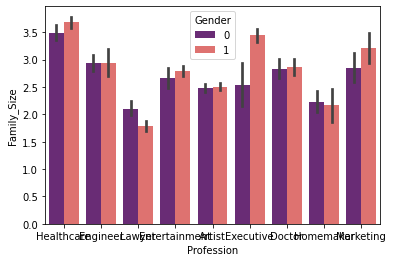

In [ ]:
#2
ax=sns.barplot(data['Profession'], data['Family_Size'], hue=data['Gender'], palette="magma")
'''for bar in ax.patches:
    if bar.get_height() > 2.5:
        bar.set_color('green')    
    else:
        bar.set_color('grey')'''

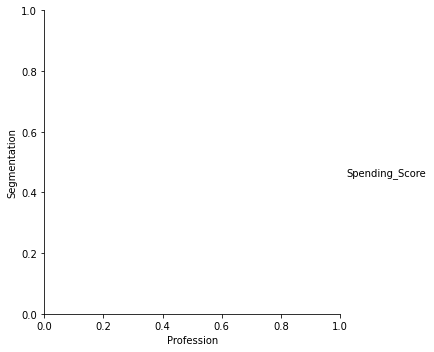

In [ ]:
#1.data analysis
sns.lmplot(x='Profession', y='Segmentation', hue='Spending_Score',data=data.loc[data['Spending_Score'].isin(['Low', 'High'])], fit_reg=False)

In [ ]:
#ask 15 quality questions
#understanding of use case(what problem actully is and how you are solving it)
#EDA
#EDA 7 analysis